# ADMN5016 Assignment
## Proof of Concept for Machine Learning Application

### Problem:
To help start up cellphone businesses to determine the price range of a cellphone.

# Initial Data Report

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import stats
import seaborn as sns
import missingno as msno
import plotly.express as px
import warnings
import pickle
from IPython.display import Image


warnings.filterwarnings("ignore")

#for pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler


#computing resources
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import GaussianNB

#hyperparmeter tuning
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV, StratifiedKFold

#testings
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,cohen_kappa_score,f1_score,log_loss,roc_auc_score, precision_score, recall_score

# Loading Dataset

In [3]:
df = pd.read_csv("MobilePrice.csv")

## Describe Data

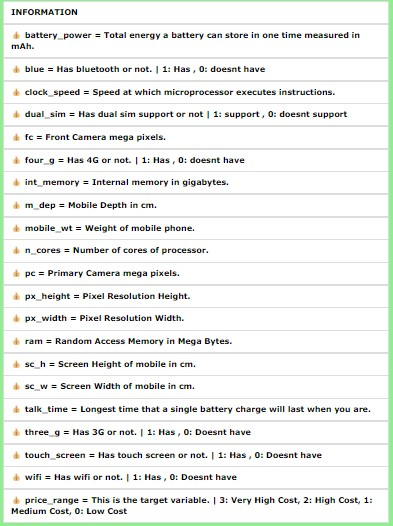

In [45]:
path = "information.jpg"
Image(filename = path)

In [4]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [5]:
df.shape

(2000, 21)

In [6]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [7]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [9]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [10]:
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

## Check data Validity

### Check Missing Data

In [11]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

No Missing Data in the dataframe

### Check unique

In [12]:
{column: len(df[column].unique()) for column in df.columns}

{'battery_power': 1094,
 'blue': 2,
 'clock_speed': 26,
 'dual_sim': 2,
 'fc': 20,
 'four_g': 2,
 'int_memory': 63,
 'm_dep': 10,
 'mobile_wt': 121,
 'n_cores': 8,
 'pc': 21,
 'px_height': 1137,
 'px_width': 1109,
 'ram': 1562,
 'sc_h': 15,
 'sc_w': 19,
 'talk_time': 19,
 'three_g': 2,
 'touch_screen': 2,
 'wifi': 2,
 'price_range': 4}

### Redundant Data

In [13]:
#Dropping the data that is not that useful
df = df.drop(['three_g'],axis=1)

In [14]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,0


## Training

In [15]:
y = df['price_range']
x =df.drop(['price_range'], axis=1)

In [16]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [17]:
x.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,0


In [18]:
def preprocess_inputs(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    #scaler = StandardScaler()
    #scaler.fit(X_train)
    
   # X_train = pd.DataFrame(scaler.transform(X_train),index=X_train.index, columns = X_train.columns)
   # X_test = pd.DataFrame(scaler.transform(X_test),index=X_test.index, columns = X_test.columns)
    return X_train, X_test, y_train, y_test

In [19]:
X_train,X_test, y_train, y_test = preprocess_inputs(x,y)

In [20]:
X_train.shape

(1600, 19)

In [21]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 968 to 1126
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1600 non-null   int64  
 1   blue           1600 non-null   int64  
 2   clock_speed    1600 non-null   float64
 3   dual_sim       1600 non-null   int64  
 4   fc             1600 non-null   int64  
 5   four_g         1600 non-null   int64  
 6   int_memory     1600 non-null   int64  
 7   m_dep          1600 non-null   float64
 8   mobile_wt      1600 non-null   int64  
 9   n_cores        1600 non-null   int64  
 10  pc             1600 non-null   int64  
 11  px_height      1600 non-null   int64  
 12  px_width       1600 non-null   int64  
 13  ram            1600 non-null   int64  
 14  sc_h           1600 non-null   int64  
 15  sc_w           1600 non-null   int64  
 16  talk_time      1600 non-null   int64  
 17  touch_screen   1600 non-null   int64  
 18  wifi  

In [22]:
X_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,touch_screen,wifi
968,1923,0,0.5,1,7,0,46,0.5,191,1,10,767,1759,1489,10,9,3,1,1
240,633,1,2.2,0,0,1,49,0.1,139,8,1,529,1009,3560,11,1,16,1,1
819,1236,0,0.9,1,2,1,57,0.1,188,1,14,517,809,1406,14,12,20,0,1
692,781,0,1.1,0,2,0,38,0.4,198,5,7,304,1674,3508,13,8,5,0,1
420,1456,1,0.5,1,7,0,7,0.4,105,5,12,823,1104,1587,6,5,20,0,1


In [23]:
X_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,touch_screen,wifi
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.00000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,1240.808750,0.490625,1.513625,0.515000,4.310000,0.52250,32.270000,0.502563,140.633750,4.542500,9.878125,644.226250,1249.091875,2116.131250,12.220000,5.705625,10.956875,0.505000,0.498750
std,440.727396,0.500068,0.820189,0.499931,4.339288,0.49965,18.195165,0.286882,35.338171,2.289972,6.014847,445.436918,431.530171,1080.711326,4.205372,4.338863,5.507742,0.500131,0.500155
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.00000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,258.000000,5.000000,0.000000,2.000000,0.000000,0.000000
25%,852.000000,0.000000,0.675000,0.000000,1.000000,0.00000,16.000000,0.200000,109.000000,3.000000,5.000000,280.000000,874.000000,1212.750000,9.000000,2.000000,6.000000,0.000000,0.000000
50%,1231.000000,0.000000,1.500000,1.000000,3.000000,1.00000,32.500000,0.500000,141.000000,4.000000,10.000000,554.500000,1241.500000,2110.500000,12.000000,5.000000,11.000000,1.000000,0.000000
75%,1619.000000,1.000000,2.225000,1.000000,7.000000,1.00000,48.000000,0.800000,171.000000,7.000000,15.000000,945.500000,1626.250000,3042.000000,16.000000,9.000000,16.000000,1.000000,1.000000
max,1998.000000,1.000000,3.000000,1.000000,19.000000,1.00000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000


# Modelling Technique

In [24]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Linear SVC": LinearSVC(),
    "Naive Bayes" : GaussianNB()
}

In [25]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name+ " trained.")

Random Forest trained.
Linear SVC trained.
Naive Bayes trained.


In [26]:
results = []
for name, model in models.items():
    result = model.score(X_test,y_test)
    results.append(result)
    print(name+ ": {:.2f}%".format(result*100))

Random Forest: 88.00%
Linear SVC: 53.50%
Naive Bayes: 80.00%


In [27]:
def metricsmodel(y_test,y_predh):
    
    print("Precision = {:.2f}".format(precision_score(y_test, y_predh)))
    print("Recall = {:.2f}".format(recall_score(y_test, y_predh)))
    print("F1 Score Macro = {:.2f}".format(f1_score(y_test, y_predh, average = 'macro')))
    print("AUC = {:.2f}".format(roc_auc_score(y_test, y_predh)))
    print("-----------------------------------------------------------")

In [29]:
def cm_plot(y_test,y_pred,model):
    cm = confusion_matrix(y_test, y_pred,labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()

Random Forest
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       105
           1       0.84      0.84      0.84        91
           2       0.79      0.80      0.80        92
           3       0.92      0.89      0.90       112

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400


 Accuracy: 87.2%, Recall 87.2%, Precision 87.3%
Linear SVC
              precision    recall  f1-score   support

           0       0.41      1.00      0.58       105
           1       0.00      0.00      0.00        91
           2       0.00      0.00      0.00        92
           3       0.66      0.87      0.75       112

    accuracy                           0.51       400
   macro avg       0.27      0.47      0.33       400
weighted avg       0.29      0.51      0.36       400


 Accuracy: 50.5%, Recall 50.5%, Precision 29.5%
Naive B

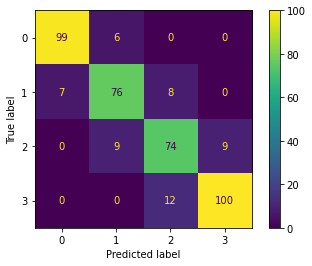

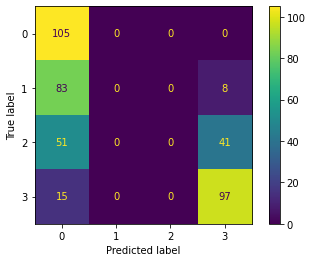

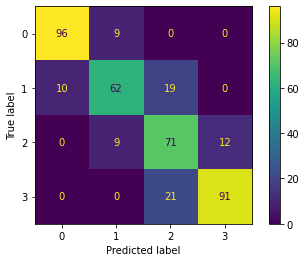

In [51]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(name)
    print(classification_report(y_test,y_pred))
    precision_test = precision_score(y_test, y_pred, average = 'weighted')
    recall_test = recall_score(y_test, y_pred, average = 'weighted')
    accuracy_test = accuracy_score(y_test, y_pred)
    cm_plot(y_test,y_pred,model)
    print("\n Accuracy: {a:3.1%}, Recall {r:3.1%}, Precision {p:3.1%}".format(a=accuracy_test,r=recall_test, p=precision_test))

### Random Forest has better precision compared to the other models

# HyperParametric Tuning

In [42]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [None, 80, 90, 100, 110],
    'min_samples_leaf': [1,3, 4, 5],
    "max_features": ["sqrt", 'log2', None],
    'min_samples_split': [2, 8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)  
}
clf=RandomForestClassifier()
name='Random Forest(Fine Tuned)'

In [43]:
def grid_search_wrapper(refit_score='precision_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=10)
    grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=True, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # make the predictions
    y_pred = grid_search.predict(X_test)
    
    precision_test = precision_score(y_test, y_pred, average = 'weighted')
    recall_test = recall_score(y_test, y_pred, average = 'weighted')
    accuracy_test = accuracy_score(y_test, y_pred)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    print("\n Accuracy: {a:3.1%}, Recall {r:3.1%}, Precision {p:3.1%}".format(
                                                                            a=accuracy_test,
                                                                            r=recall_test,
                                                                            p=precision_test      
                                                                            )
        )
    return grid_search

In [47]:
grid_search_clf = grid_search_wrapper(refit_score='precision_score')

Best params for precision_score
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

 Accuracy: 88.5%, Recall 88.5%, Precision 88.7%


Best params for precision_score

{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

 Before Tuning: Accuracy: 87.2%, Recall 87.2%, Precision 87.3%
 
 After Tuning: Accuracy: 88.5%, Recall 88.5%, Precision 88.7%

# Applying the HyperParameter Tuning to the best model

In [32]:
X = np.array([[842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,1]])

In [33]:
y_pred = model.predict(X)
y_pred

array([2], dtype=int64)

In [40]:
data ={"model":model,
       "y_test":y_test,
       "y_pred": model.predict(X_test)}

with open('saved_steps.pkl','wb')as file:
    pickle.dump(data,file)

In [38]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

model_loaded = data["model"]


In [39]:
y_pred = model_loaded.predict(X)
y_pred

array([2], dtype=int64)